# Preprocessing

### Import libraries

In [14]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

### Load Data

In [15]:
df = pd.read_csv('speed-dating.csv')
print(df.head(1))
print(df.dtypes)

   has_null  wave  gender   age  age_o  d_age d_d_age  \
0         0     1  female  21.0   27.0      6   [4-6]   

                                      race                       race_o  \
0  'asian/pacific islander/asian-american'  european/caucasian-american   

   samerace  ...  d_expected_num_interested_in_me  d_expected_num_matches  \
0         0  ...                            [0-3]                   [3-5]   

  like guess_prob_liked d_like  d_guess_prob_liked  met  decision  decision_o  \
0  7.0              6.0  [6-8]               [5-6]  0.0         1           0   

   match  
0      0  

[1 rows x 123 columns]
has_null                int64
wave                    int64
gender                 object
age                   float64
age_o                 float64
                       ...   
d_guess_prob_liked     object
met                   float64
decision                int64
decision_o              int64
match                   int64
Length: 123, dtype: object


### Solving null values

In [16]:
has_null = df.isnull().values.any()
print(f"Does data has null value: {has_null}")

proportion = df['has_null'].mean()
print(f"The proportion of data who has null value: {proportion:.2f}")
# 0.87 indicates that we can't drop row that has null values directly

Does data has null value: True
The proportion of data who has null value: 0.87


In [17]:
# transform categories to numeric
object_columns = df.select_dtypes(include=['object']).columns # gets all columns of type object

label_encoder = LabelEncoder()
for column in object_columns:
    df[column] = label_encoder.fit_transform(df[column])
    
df = df.astype(float)
for data_type in df.dtypes:
    if data_type != np.float64:
        print("There are data that has not be transformed to float.")

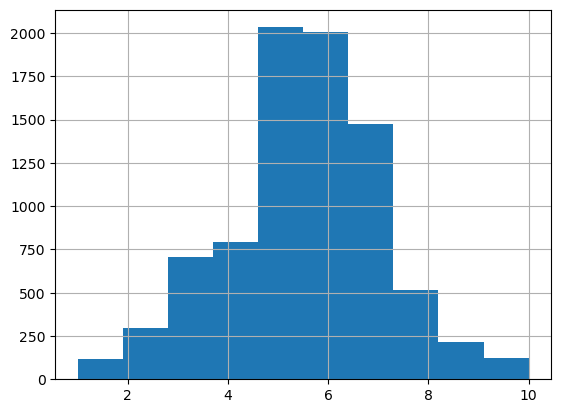

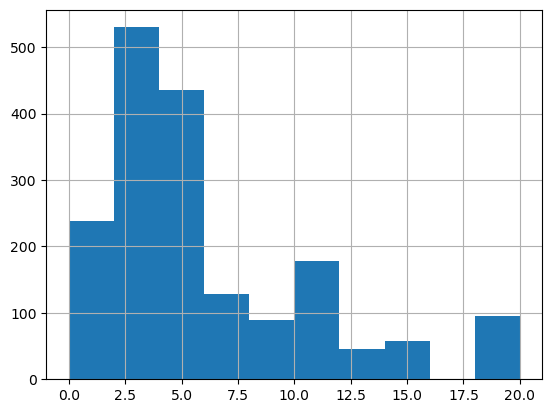

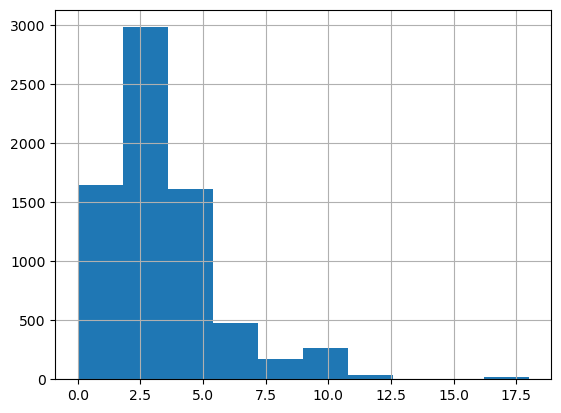

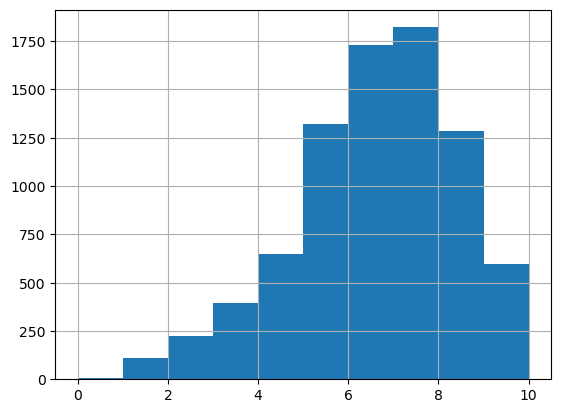

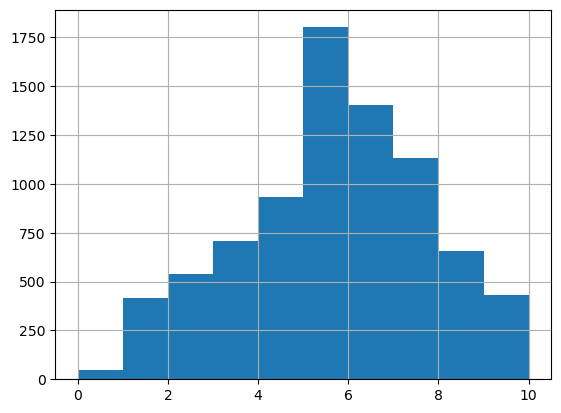

In [18]:
# take a look to the features that have a lot of null values
selected_features = [109, 110, 111, 115, 116]
for i in selected_features:
    plt.figure()
    df.iloc[:, i].hist()
    plt.show()

In [19]:
df = df.fillna(df.median())

has_null = df.isnull().values.any()
print(f"Does data has null value: {has_null}")

Does data has null value: False


Although the original article provides data on the number of people per group, this data is inconsistent with the actual data and needs to be revised.

In [20]:
date_ppl_nums = []
identification_array = ['wave', 'gender', 'age', 'race', 'field', 'attractive_important', 
                        'sincere_important', 'intellicence_important', 'funny_important', 
                        'ambtition_important', 'shared_interests_important']

# print(df.groupby(['wave']).size())

counts = df.groupby(identification_array).size()
# print(counts.iloc[111:129])

group_counts = counts.groupby(['wave', 'gender'])
male_female = group_counts.median()
female_male = group_counts.sum() / male_female
print(male_female)
print(female_male)

wave  gender
1.0   0.0       10.0
      1.0       10.0
2.0   0.0       16.0
      1.0       19.0
3.0   0.0       10.0
      1.0       10.0
4.0   0.0       18.0
      1.0       18.0
5.0   0.0       10.0
      1.0       10.0
6.0   0.0        5.0
      1.0        5.0
7.0   0.0       16.0
      1.0       16.0
8.0   0.0       10.0
      1.0       10.0
9.0   0.0       20.0
      1.0       20.0
10.0  0.0        9.0
      1.0        9.0
11.0  0.0       21.0
      1.0       21.0
12.0  0.0       14.0
      1.0       14.0
13.0  0.0        9.0
      1.0       10.0
14.0  0.0       18.0
      1.0       20.0
15.0  0.0       19.0
      1.0       18.0
16.0  0.0        8.0
      1.0        6.0
17.0  0.0       14.0
      1.0       10.0
18.0  0.0        6.0
      1.0        6.0
19.0  0.0       15.0
      1.0       15.0
20.0  0.0        7.0
      1.0        6.0
21.0  0.0       22.0
      1.0       22.0
dtype: float64
wave  gender
1.0   0.0       10.0
      1.0       10.0
2.0   0.0       19.0
      1.0     

In [21]:
# the counts above don't align with each other, deal with the problem
print(df.shape)
# print(df.iloc[1755])

indices_to_drop = list(range(1755, 1846, 10)) # index to remove
df = df.drop(indices_to_drop) # remove from df

print(df.shape)
# print(df.iloc[1755])

(8378, 123)
(8368, 123)


### Data Exploration
tbd.

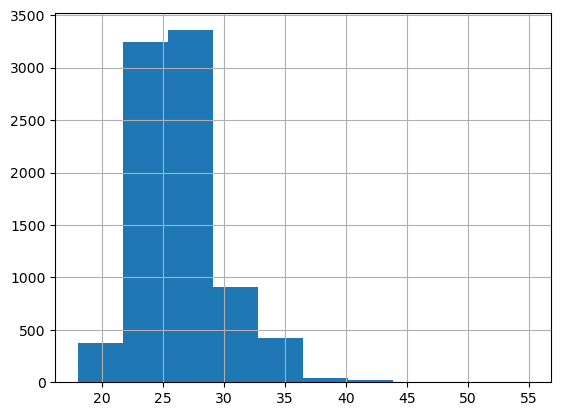

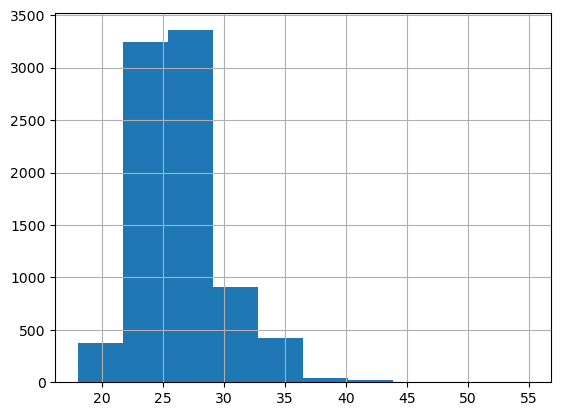

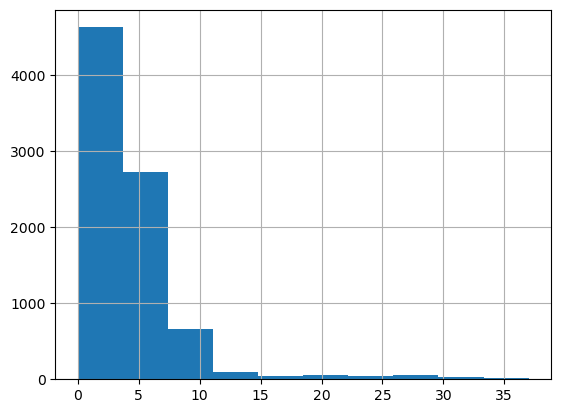

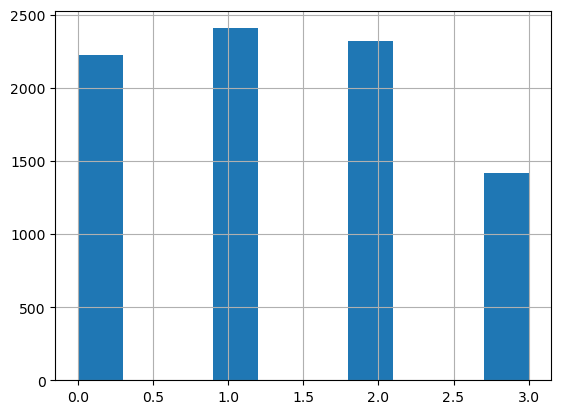

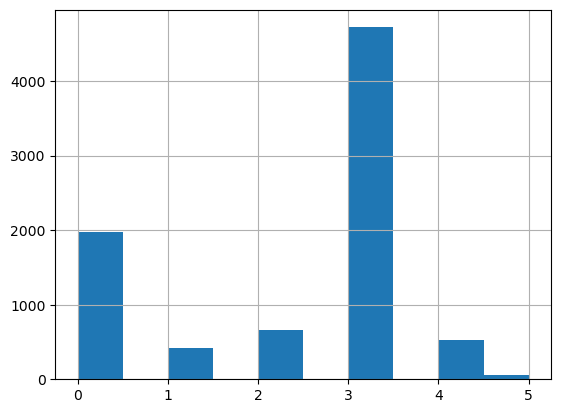

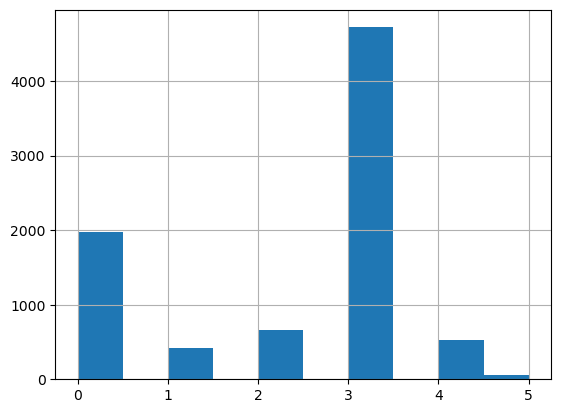

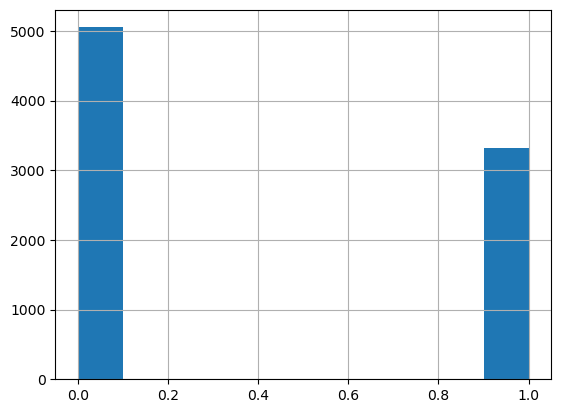

In [22]:
# I only show some of the features because 123 is too much
# You can modify the following code scope if necessary.
for i in range(3, 10):
    plt.figure()
    df.iloc[:, i].hist()
    plt.show()

### Generate data sets for male and female, and query tables for match

In [23]:
# select features
self_columns = ['gender', 'age', 'race', 'field', 'd_attractive_important', 'd_sincere_important', 
                'd_intellicence_important', 'd_funny_important', 'd_ambtition_important', 'd_shared_interests_important', 
                'ambition', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 
                'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']
partner_columns = ['age_o', 'race_o', 'd_pref_o_attractive', 'd_pref_o_sincere', 'd_pref_o_intelligence', 
                   'd_pref_o_funny', 'd_pref_o_ambitious', 'd_pref_o_shared_interests', 'd_interests_correlate']
label = ['match']

In [34]:
fm_int = female_male.astype(int)
mf_int = male_female.astype(int)
self_df = pd.DataFrame(columns=df.columns)
# print(self_df.columns)
index  = 0
for i in range(0, len(female_male), 2):
    temp = fm_int.iloc[i] * mf_int.iloc[i]

    # print(df.iloc[list(range(index, index + temp, mf_int.iloc[i]))])
    new_rows = df.iloc[list(range(index, index + temp, mf_int.iloc[i]))]
    self_df = pd.concat([self_df, new_rows], ignore_index=True)
    # print(self_df)
    index += temp

    new_rows = df.iloc[list(range(index, index + temp, fm_int.iloc[i]))]
    self_df = pd.concat([self_df, new_rows], ignore_index=True)
    index += temp
    
print(self_df.shape)
self_df = self_df[self_columns]
print(self_df.shape)
print(self_df)

(551, 123)
(551, 28)
     gender   age  race  field  d_attractive_important  d_sincere_important  \
0       0.0  21.0   0.0  192.0                     0.0                  1.0   
1       0.0  24.0   3.0  192.0                     2.0                  0.0   
2       0.0  25.0   3.0  177.0                     2.0                  0.0   
3       0.0  23.0   3.0  192.0                     1.0                  1.0   
4       0.0  21.0   3.0  192.0                     1.0                  0.0   
..      ...   ...   ...    ...                     ...                  ...   
546     1.0  30.0   3.0  170.0                     2.0                  0.0   
547     1.0  28.0   3.0   63.0                     1.0                  1.0   
548     1.0  30.0   3.0  197.0                     2.0                  0.0   
549     1.0  27.0   1.0  170.0                     2.0                  1.0   
550     1.0  25.0   3.0   27.0                     2.0                  0.0   

     d_intellicence_important 

C:\Users\nemuru\AppData\Local\Temp\ipykernel_26552\1024974278.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self_df = pd.concat([self_df, new_rows], ignore_index=True)


In [48]:
female_df = self_df.loc[self_df['gender'] == 0] # Select women
print(female_df.shape)
male_df = self_df.loc[self_df['gender'] == 1] # Select men
print(male_df.shape)

(274, 28)
(277, 28)


In [45]:
match_df = pd.DataFrame(columns=['female_id', 'male_id', 'match'])
index  = 0
female_index = 0
male_index = 0
for i in range(0, len(female_male), 2):
    group_len = fm_int.iloc[i] * mf_int.iloc[i] * 2
    male_index = female_index + fm_int.iloc[i]

    for j in range(fm_int.iloc[i]):
        for k in range(mf_int.iloc[i]):
            match = df.iloc[index + j * mf_int.iloc[i] + k]['match'].astype(int)
            # print(match)
            new_rows = pd.DataFrame({'female_id': [female_index + j], 'male_id': [male_index + k], 'match': [match]}) # create new row
            match_df = pd.concat([match_df, new_rows], ignore_index=True) # append row

    index += group_len
    female_index += fm_int.iloc[i] + mf_int.iloc[i]

# print(df.shape)
print(match_df)

     female_id male_id match
0            0      10     0
1            0      11     0
2            0      12     1
3            0      13     1
4            0      14     1
...        ...     ...   ...
4179       528     546     0
4180       528     547     0
4181       528     548     0
4182       528     549     0
4183       528     550     0

[4184 rows x 3 columns]


### Save preprocessed data

In [49]:
# save the preprocessed data
df.to_pickle('preprocessed_data/original_data.pkl')
self_df.to_pickle('preprocessed_data/self_data.pkl')
female_df.to_pickle('preprocessed_data/female_self_data.pkl')
male_df.to_pickle('preprocessed_data/male_self_data.pkl')
match_df.to_pickle('preprocessed_data/match_data.pkl')